# IPL First Innings Score Prediction

                                                                                          Name - B.Sai Pavan Kumar
                                                                                          Roll no - AM.EN.U4CSE19214

# Problem Definition

As we know Cricket is the foremost loved game, after football and most 
loved game in our India. There are many people who tries to predict the 
scores of matches based on their individual cricket sense. Cricket has certain 
rules and game system. When a cricket match is played many factors comes 
into consideration such as venue, players performance etc.  
                                                In this project we are going to predict final score 
of a team in a match by analyzing data of previous matches. We use features 
such as current score and no of wickets and score in last few overs. Our 
system finally present quantitative results displayed by best suitable 
algorithm having highest accuracy. 
 Cricket is a sport with multiple formats, different playing standards and 
varying duration. T20 and ODI are two limited overs formats among them. 
We try to predict scores in these two formats in our project.

### Datasets

-> We have found suitable datasets required for our project in Kaggle website. 

The data is about previous records of ball-to-ball information mapped by a 
batsman to a bowler which includes runs, wickets, overs, runs scored in last 5 
overs, wickets for last 5 overs, strike, non-striker. 
                The datasets are being used by various cricket teams to plan against opponent 
team players to compare their stats against their bowlers and viceversa.

Our Datasets are IPL,ODI and T20 scores datasets

## Prepare Data

#### Data Loading

In [2]:
# Importing essential libraries
import pandas as pd

# Loading the dataset
data = pd.read_csv('ipl.csv')

In [3]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


#### Pre-Processing

In [4]:
data.describe(include='all')

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014,76014,76014,76014,76014,76014,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
unique,NaN,442,35,14,14,411,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2010-03-25,M Chinnaswamy Stadium,Mumbai Indians,Delhi Daredevils,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,257,7443,10213,10245,1921,1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,308.627740,NaN,NaN,NaN,NaN,NaN,NaN,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,NaN,NaN,NaN,NaN,NaN,NaN,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
# --- Data Cleaning ---
# Removing unwanted columns to make sure the variables which are not needed in generating model are being removed
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(labels=columns_to_remove, axis=1, inplace=True)

In [7]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
# Keeping only consistent teams
#These are array of teams that are currently not playing in IPL
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
#Dropping all other teams instead of these consistent teams from both batting and bowling rows
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]

In [10]:
# Removing the first 5 overs data in every match to avoid the false prediction
# We cant predict the score by seeing the score in 5 overs we need 
# atleast 5+ overs to estimate considering real world situation
data = data[data['overs']>=5.0]

In [11]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [12]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [13]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_data = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team'])
# Here we cannot apply teams directly so instead i hard coded all the teams in dataset
# 1 if it is batting or bowling or else 0

In [14]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [16]:
# Rearranging the columns so target value will be at last
encoded_data = encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [17]:
encoded_data.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


### Summarization

In [18]:
encoded_data.shape

(40108, 23)

In [19]:
encoded_data.columns

Index(['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [20]:
encoded_data.describe()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
count,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,...,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000
mean,0.140570,0.111798,0.146654,0.116062,0.157076,0.112471,0.127231,0.088137,0.111524,0.153635,...,0.142939,0.119353,0.144186,0.053107,12.313459,94.972699,3.042186,38.887903,1.314027,161.947517
std,0.347582,0.315122,0.353765,0.320303,0.363877,0.315949,0.333236,0.283498,0.314784,0.360603,...,0.350015,0.324207,0.351282,0.224249,4.323001,40.966837,1.906814,11.503810,1.062650,29.831496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,0.000000,10.000000,0.000000,67.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.500000,62.000000,2.000000,31.000000,1.000000,142.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.300000,90.000000,3.000000,38.000000,1.000000,163.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.200000,124.000000,4.000000,46.000000,2.000000,183.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,19.600000,246.000000,10.000000,94.000000,7.000000,246.000000


# Visualization

Text(0.5, 1.0, 'Total score Distribution Plot')

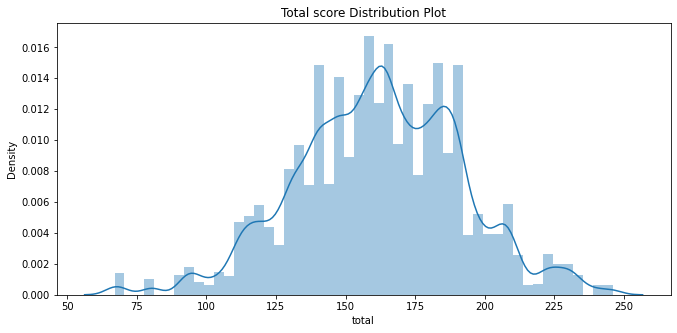

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# This makes it very easy to spot anomalies, such as outliers
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(encoded_data['total'])
plt.title('Total score Distribution Plot')

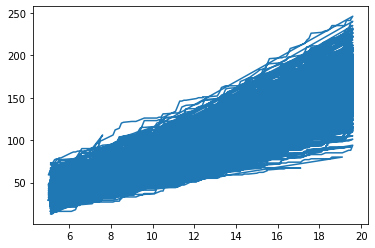

In [22]:
plt.plot(encoded_data.overs,encoded_data.runs)
plt.show()

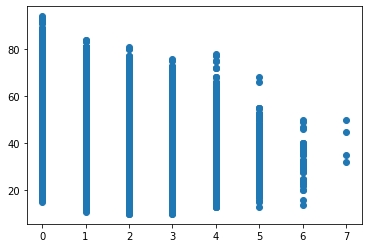

In [23]:
plt.scatter(encoded_data.wickets_last_5,encoded_data.runs_last_5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1cc33d321f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cc33d32910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cc33d22e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1cc33d3e070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cc33d3e400>],
 'means': []}

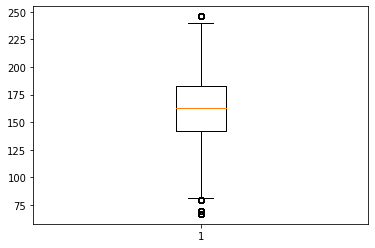

In [24]:
plt.boxplot(encoded_data.total)

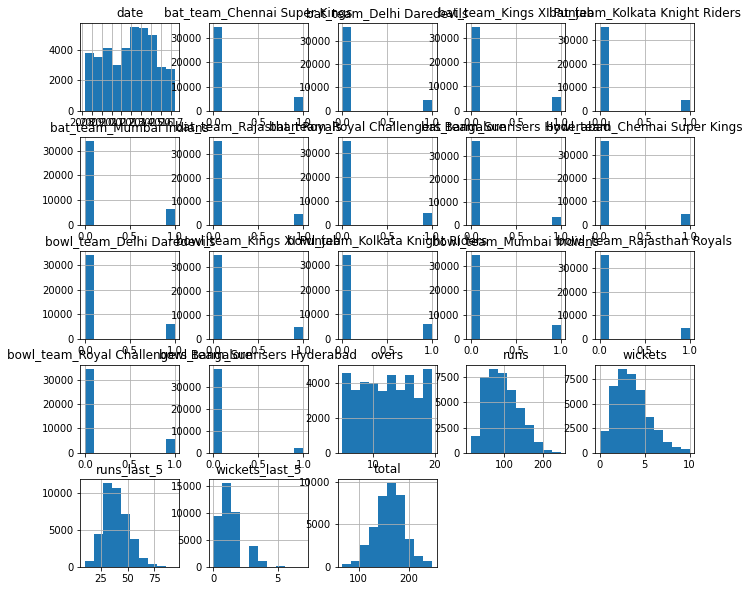

In [25]:
encoded_data.hist(figsize=[11,10])
plt.show()

<AxesSubplot:title={'center':'runs and total'}, xlabel='total', ylabel='runs'>

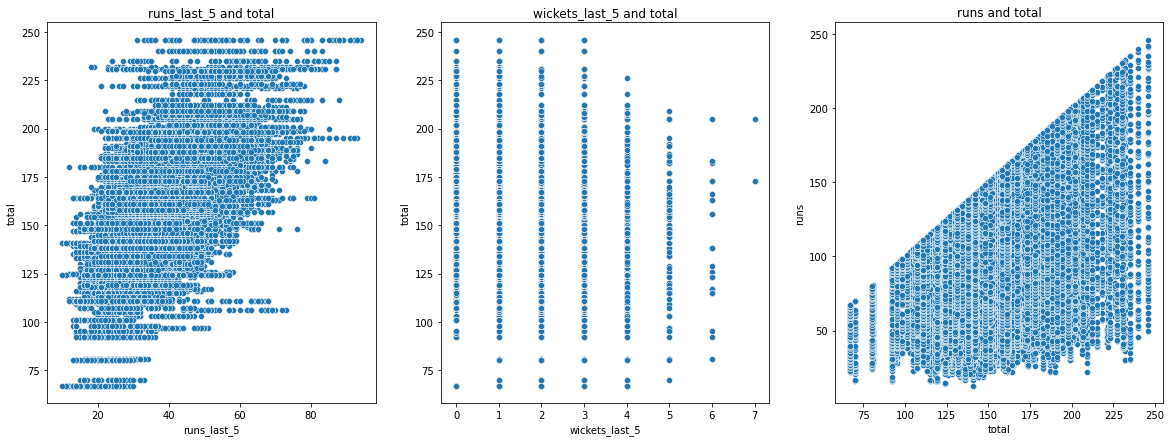

In [26]:
import seaborn as sns
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("runs_last_5 and total")
sns.scatterplot(x='runs_last_5',y='total',data=encoded_data)
plt.subplot(1,3,2)
plt.title("wickets_last_5 and total")
sns.scatterplot(x='wickets_last_5',y='total',data=encoded_data)
plt.subplot(1,3,3)
plt.title("runs and total")
sns.scatterplot(y='runs',x='total',data=encoded_data)

### Python packages 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

### Supervised/unsupervised Learning Algorithms 

In [28]:
#In datasets related to time and date we have to split train and test sample based on date.
# I have seperated dataset based on year 2017 i.e => after 2016 comes under testing and remaining under training
X_train = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year <= 2016]
X_test = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year >= 2017]

In [29]:
y_train = encoded_data[encoded_data['date'].dt.year <= 2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2017]['total'].values

In [30]:
#Removing date column as we dont need that to train model
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [31]:
# Data to be used for k-fold
X = X_train.append(X_test)
X = X.values
y = np.concatenate([y_train,y_test])

In [32]:
#To find accuracy of our model
def custom_accuracy(y_test,y_pred,thresold):
    ans = 0
    n = len(y_pred)
    for i in range(n):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            ans += 1
    return ((ans/n)*100)

#### KNN Implementation

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

k_acc = custom_accuracy(y_test,y_pred,20)
print("Custom accuracy for knn:" , k_acc)

Custom accuracy for knn: 64.00287976961843


#### KNN Implementation from scratch

In [34]:
def euclidDistance(a,b):
    return np.linalg.norm(a-b)

In [35]:
def nearestNeighbors(trainingData,testSample,k):
    distances = []
    for x in trainingData:
        distances.append([x,euclidDistance(x[0:testSample.shape[0]],testSample)])
    distances.sort(key = lambda x : x[-1])
    distances = np.array(distances, dtype = 'object')
    return distances[0:k]

In [36]:
def predict(trainingData,testData,k):
    res = []
    for x in testData:
        neighbors = nearestNeighbors(trainingData,x,k)
        values = []
        for y in neighbors:
            values.append(y[0][-1])
        res.append(max(set(values),key = values.count))
    return res

In [37]:
trainingData = np.column_stack((np.array(X_train.values),np.array(y_train))) 
testingData = np.array(X_test.values[0:30])
pred = predict(trainingData,testingData,5)
print("Custom accuracy for KNN(scratch):" , custom_accuracy(y_test,pred,20))

Custom accuracy for KNN(scratch): 60.0


K-fold cross validation

In [38]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x1, y1)
    y3 = knn.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [62.05435053602593, 67.71378708551484, 64.94639740713039, 62.777362253802046, 66.66666666666666, 64.64722014460234, 64.54749439042632, 64.57242582897034, 61.770573566084785, 64.3142144638404]
Maximum Accuracy - 67.71378708551484
Minimum Accuracy - 61.770573566084785
Average Accuracy - 64.4010492343064


#### Linear regression

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)*100
l_acc = custom_accuracy(y_test,y_pred,20)

print("R square value:" , score)
print("Custom accuracy for linear regression:" , l_acc)

R square value: 75.19522885796084
Custom accuracy for linear regression: 80.99352051835854


K-fold cross validation

In [40]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    lr = LinearRegression()
    lr.fit(x1, y1)
    y3 = lr.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [77.03814510097232, 81.12690102218897, 78.98279730740464, 74.56993268511593, 82.4731987035652, 77.26252804786836, 75.24308152580403, 76.96335078534031, 77.03241895261846, 81.74563591022444]
Maximum Accuracy - 82.4731987035652
Minimum Accuracy - 74.56993268511593
Average Accuracy - 78.24379900411026


### RandomForest Regressor

In [41]:
rf = RandomForestRegressor(n_estimators=100,max_features=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test,y_test)*100
r_acc = custom_accuracy(y_test,y_pred,20)

print("R square value:" , score)
print("Custom accuracy for linear regression:" , r_acc)

R square value: 67.2410442886391
Custom accuracy for linear regression: 74.51403887688986


K-fold cross validation

In [46]:
kf = KFold(n_splits=10, random_state=None) 
accuracy = []
avg_a = 0
max_a = 0
min_a = 100

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    rf = RandomForestRegressor(n_estimators=100,max_features=None)
    rf.fit(x1, y1)
    y3 = rf.predict(x2)
    
    accu = custom_accuracy(y2,y3,20)
    accuracy += [accu]
    max_a = max(max_a,accu)
    min_a = min(min_a,accu)
    avg_a += accu
    
print("Accuracies -",accuracy)
print("Maximum Accuracy -",max_a)
print("Minimum Accuracy -",min_a)
print("Average Accuracy -",avg_a/10)

Accuracies - [70.0573423086512, 77.66143106457243, 76.68910496135626, 70.10720518573922, 78.68362004487659, 72.05185739217153, 73.37322363500374, 75.5671902268761, 76.50872817955113, 75.9850374064838]
Maximum Accuracy - 78.68362004487659
Minimum Accuracy - 70.0573423086512
Average Accuracy - 74.6684740405282


# Accuracy plot

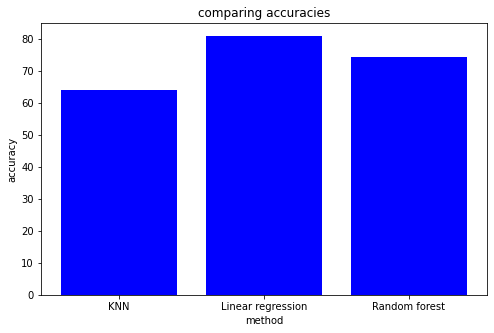

In [47]:
colnames = ["accuracy","names"]
acc = [[k_acc,"KNN"],[l_acc,"Linear regression"],[r_acc,"Random forest"]]

mydataframe = pd.DataFrame(acc,columns=colnames)
plt.figure(figsize=(8,5))
plt.bar("names", "accuracy", data = mydataframe, color = "blue")
plt.xlabel("method")
plt.ylabel("accuracy")
plt.title("comparing accuracies")
plt.show()

# Lets Predict the score

In [48]:
a = np.array([0,1,2,3,4,5,6,7])
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1

In [56]:
for i in range(len(consistent_teams)):
    print(i,consistent_teams[i])
bat_team = int(input("Please input the bat team from the list(0-7): "))
print()
print("You chose: ",consistent_teams[bat_team])
bat_team = b[bat_team]

0 Kolkata Knight Riders
1 Chennai Super Kings
2 Rajasthan Royals
3 Mumbai Indians
4 Kings XI Punjab
5 Royal Challengers Bangalore
6 Delhi Daredevils
7 Sunrisers Hyderabad
Please input the bat team from the list(0-7): 5

You chose:  Royal Challengers Bangalore


In [57]:
for i in range(len(consistent_teams)):
    print(i,consistent_teams[i])
bowl_team = int(input("Please input the bowl team from the list(0-7): "))
print()
print("You chose: ",consistent_teams[bowl_team])
bowl_team = b[bowl_team]

0 Kolkata Knight Riders
1 Chennai Super Kings
2 Rajasthan Royals
3 Mumbai Indians
4 Kings XI Punjab
5 Royal Challengers Bangalore
6 Delhi Daredevils
7 Sunrisers Hyderabad
Please input the bowl team from the list(0-7): 6

You chose:  Delhi Daredevils


In [58]:
overs = float(input("Please enter the current over(>5.0): "))

runs = int(input("Please enter the current score: "))

wickets = int(input("Please enter the wickets fallen: "))

runs_last_5 = int(input("Please enter the runs scored in last 5 overs: "))

wickets_last_5 = int(input("Please enter the wickets fallen in last 5 overs: "))

Please enter the current over(>5.0): 12
Please enter the current score: 144
Please enter the wickets fallen: 4
Please enter the runs scored in last 5 overs: 53
Please enter the wickets fallen in last 5 overs: 1


In [59]:
#making a vector out of the values
data=[]
for i in bat_team:
    data.append(i)
for i in bowl_team:
    data.append(i)
data.append(overs)
data.append(runs)
data.append(wickets)
data.append(runs_last_5)
data.append(wickets_last_5)
data=np.array([data])

In [60]:
print("Predicted Score from all three regressor's are: ")
pred=int(lr.predict(data))
print(pred)
print(int(knn.predict(data)))
print(int(rf.predict(data)))

Predicted Score from all three regressor's are: 
202
211
216


In [61]:
print("So the average score is from {} to {}".format(pred-5,pred+5))

So the average score is from 197 to 207


In [62]:
import pickle
# Creating a pickle file for the classifier
filename = 'ipl_model.pkl'
pickle.dump(lr, open(filename, 'wb'))